In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from matplotlib import pyplot as plt
from shapely.geometry import Point 
import folium

In [43]:
earthquake = gpd.read_file(
    "Data/earthquake.csv"
)
earthquake['geometry'] = earthquake.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


/var/folders/ny/x98qxh1124dbtz5g3f6s09hh0000gn/T/ipykernel_84631/2652066419.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



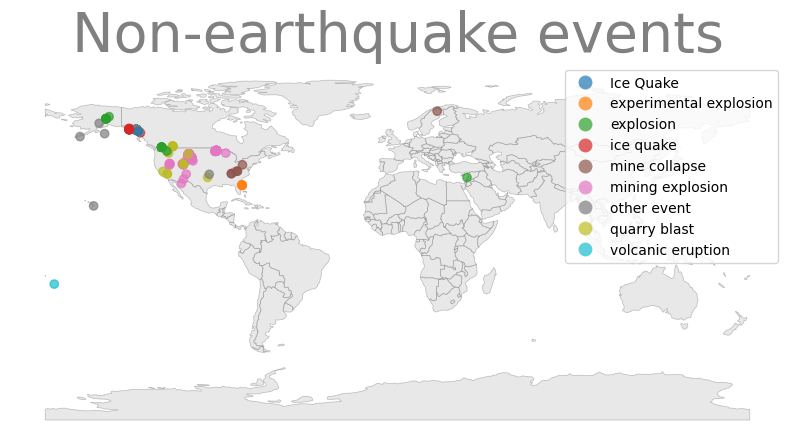

In [64]:
# multiplayer maps
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
countries.plot(ax=ax, linewidth=0.5, edgecolor="grey", 
               facecolor="lightgrey", alpha=0.5)
earthquake = earthquake[earthquake['type'].notnull()]
earthquake.plot(
    ax=ax, column="type", alpha=0.7, legend="event_type"
)
plt.title("Non-earthquake events", fontsize=40, color="grey")
ax.axis("off")
plt.show()

In [69]:
def color_producer(event_type):
    if event_type == "ice quake":
        return "lightblue"
    elif event_type == "Ice Quake":
        return "lightblue"
    elif event_type == "mining explosion":
        return "green"
    elif event_type == "quarry blast":
        return "pink"
    elif event_type == "explosion":
        return "orange"
    elif event_type == "volcanic eruption":
        return "purple"
    elif event_type == "mine collapse":
        return "red"
    elif event_type == "experimental explosion":
        return "yellow"
    else:
        return "brown"


folium = folium.Map()
# Create a geometry list from the GeoDataFrame
geo_list = [[point.xy[1][0], point.xy[0][0]] for point in earthquake.geometry]
for i, coordinates in enumerate(geo_list):
    color = color_producer(earthquake['type'].iloc[i])
    folium.CircleMarker(
        location=coordinates,
        color=color,
        radius=0.5,
        popup=f"{earthquake.type.iloc[i]}",
    ).add_to(folium)
folium